import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/deliveries.csv'
deliveries_df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/deliveries.csv'
deliveries_df = pd.read_csv(file_path)

<ipython-input-19-502af6b0c4db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_per_over.index, y=runs_per_over.values, palette='viridis')


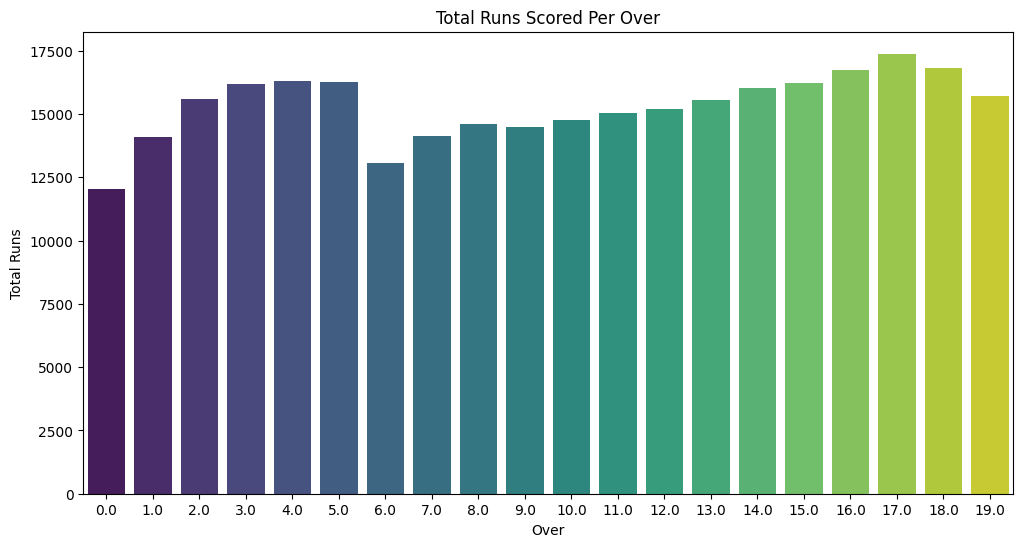

In [ ]:
# Total Runs Scored Per Over
plt.figure(figsize=(12, 6))
runs_per_over = deliveries_df.groupby('over')['total_runs'].sum()
sns.barplot(x=runs_per_over.index, y=runs_per_over.values, palette='viridis')
plt.title('Total Runs Scored Per Over')
plt.xlabel('Over')
plt.ylabel('Total Runs')
plt.xticks(range(0, 20))
plt.show()

<ipython-input-5-fbfc8d99fa40>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_types.values, y=dismissal_types.index, palette='magma')


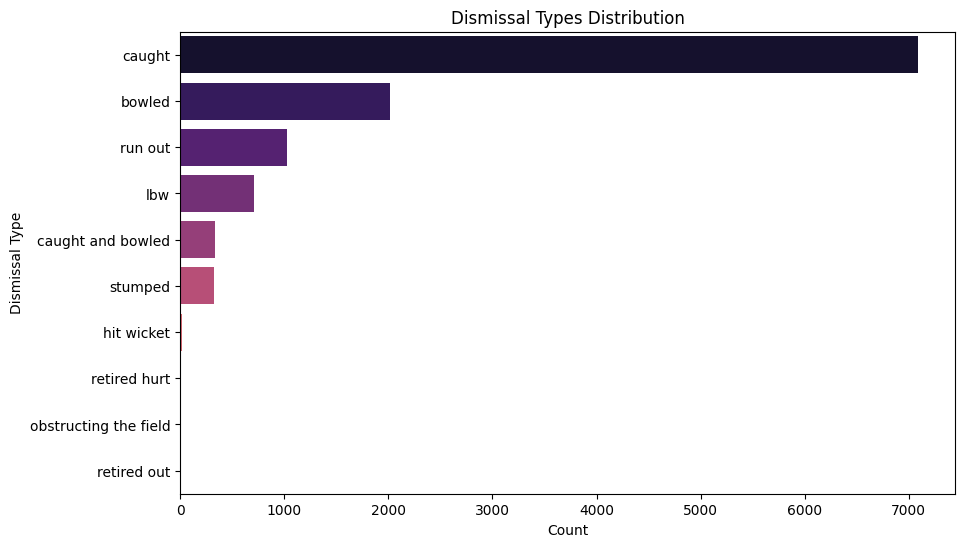

In [ ]:
# Dismissal Types Distribution
plt.figure(figsize=(10, 6))
dismissal_types = deliveries_df['dismissal_kind'].value_counts()
sns.barplot(x=dismissal_types.values, y=dismissal_types.index, palette='magma')
plt.title('Dismissal Types Distribution')
plt.xlabel('Count')
plt.ylabel('Dismissal Type')
plt.show()

<ipython-input-21-3f88dc6ff487>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extra_runs_by_team.values, y=extra_runs_by_team.index, palette='coolwarm')


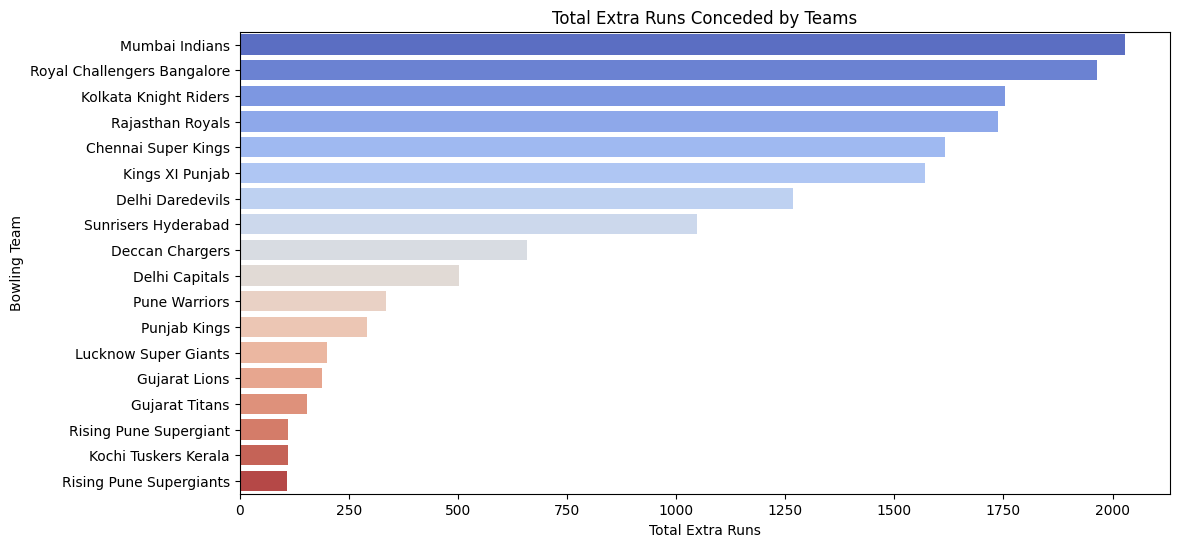

In [ ]:
# Total Extra Runs Conceded by Teams
plt.figure(figsize=(12, 6))
extra_runs_by_team = deliveries_df.groupby('bowling_team')['extra_runs'].sum().sort_values(ascending=False)
sns.barplot(x=extra_runs_by_team.values, y=extra_runs_by_team.index, palette='coolwarm')
plt.title('Total Extra Runs Conceded by Teams')
plt.xlabel('Total Extra Runs')
plt.ylabel('Bowling Team')
plt.show()

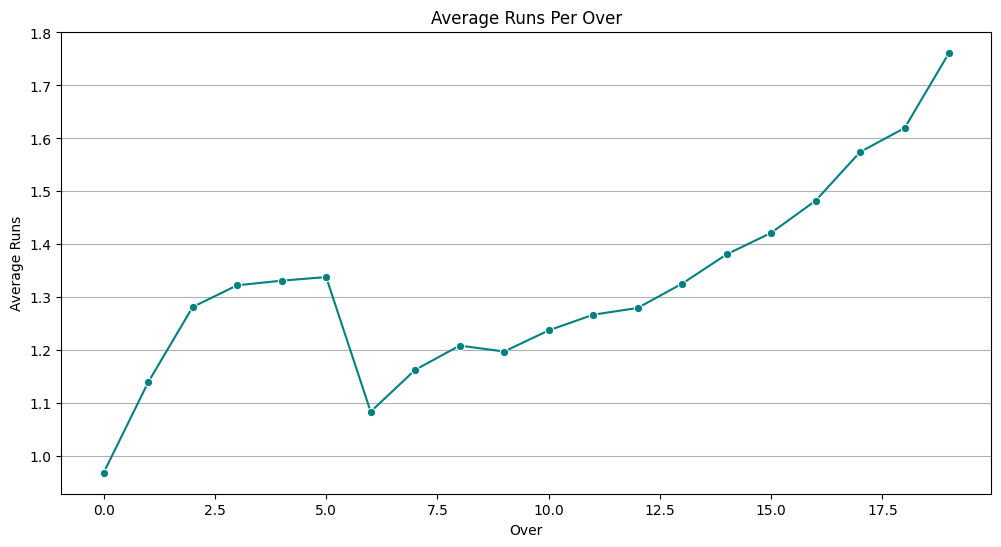

In [ ]:
# Average Runs Per Over
avg_runs_per_over = deliveries_df.groupby('over')['total_runs'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_runs_per_over.index, y=avg_runs_per_over.values, marker='o', color='teal')
plt.title('Average Runs Per Over')
plt.xlabel('Over')
plt.ylabel('Average Runs')
plt.grid(axis='y')
plt.show()

<ipython-input-30-aa28211da62c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=run_distribution.index, y=run_distribution.values, palette='Set2')


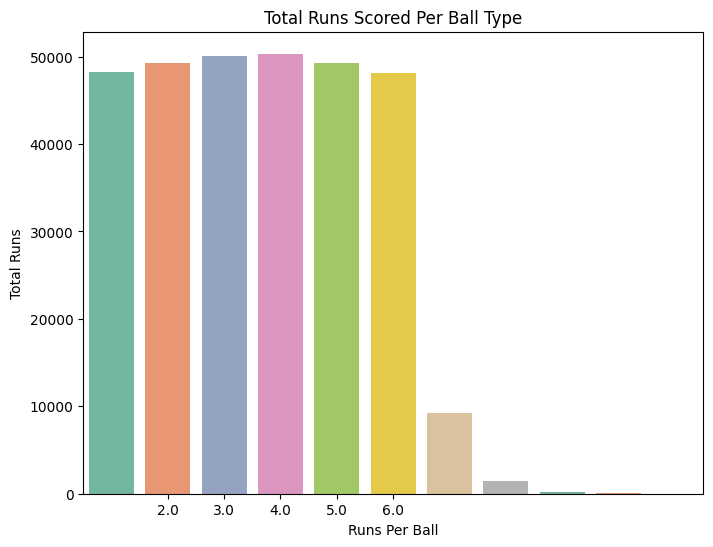

In [ ]:

# Total Runs Scored Per Ball Type
run_distribution = deliveries_df.groupby('ball')['total_runs'].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=run_distribution.index, y=run_distribution.values, palette='Set2')
plt.title('Total Runs Scored Per Ball Type')
plt.xlabel('Runs Per Ball')
plt.ylabel('Total Runs')
plt.xticks(range(1, 6))
plt.show()

<ipython-input-9-b7556e82f214>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_strike_rate['strike_rate'], y=top_10_strike_rate.index, palette='rocket')


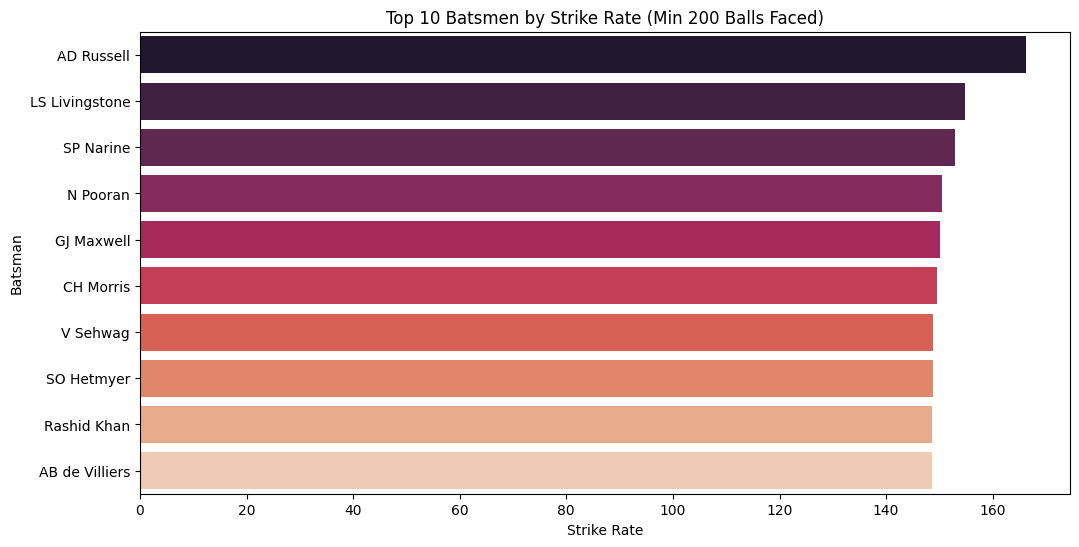

In [ ]:
# Top 10 Batsmen by Strike Rate (Min 200 Balls)
batsman_stats = deliveries_df.groupby('batter').agg({'batsman_runs': 'sum', 'ball': 'count'})
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['ball']) * 100
top_10_strike_rate = batsman_stats[batsman_stats['ball'] >= 200].nlargest(10, 'strike_rate')

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_strike_rate['strike_rate'], y=top_10_strike_rate.index, palette='rocket')
plt.title('Top 10 Batsmen by Strike Rate (Min 200 Balls Faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()

<ipython-input-10-1ecad4b10d16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sixes_by_batsman.values, y=sixes_by_batsman.index, palette='YlOrRd')


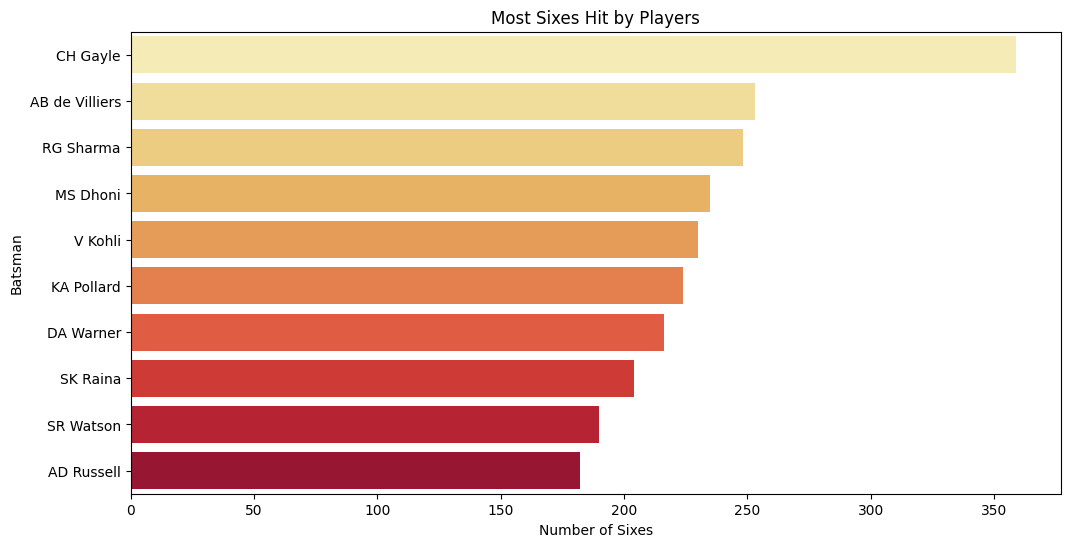

In [ ]:
# Most Sixes Hit by Players
sixes_by_batsman = deliveries_df[deliveries_df['batsman_runs'] == 6].groupby('batter')['batsman_runs'].count().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=sixes_by_batsman.values, y=sixes_by_batsman.index, palette='YlOrRd')
plt.title('Most Sixes Hit by Players')
plt.xlabel('Number of Sixes')
plt.ylabel('Batsman')
plt.show()

<ipython-input-12-d8323c17866b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dot_ball_percentage.values, y=dot_ball_percentage.index, palette='Blues')


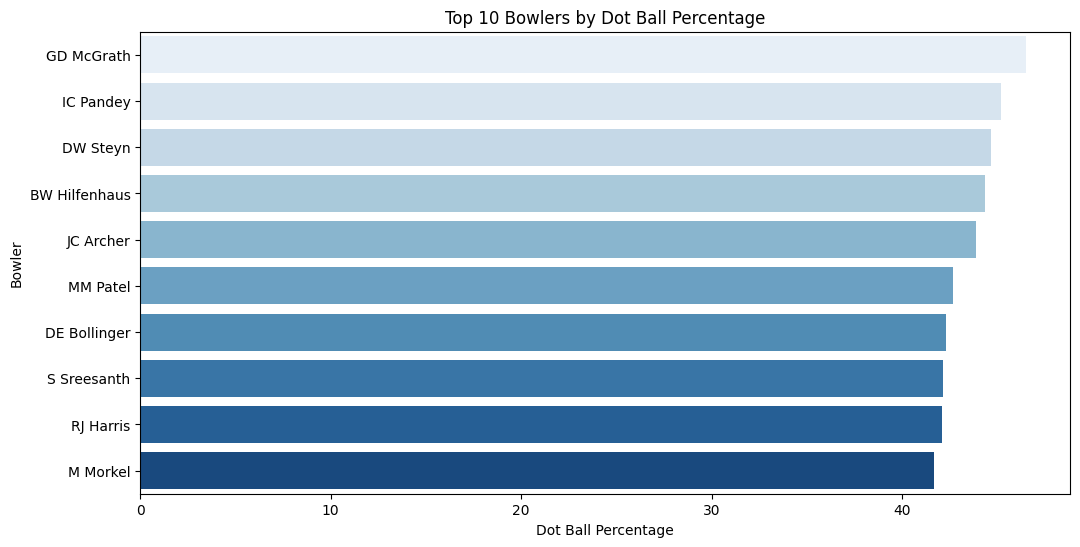

In [ ]:
# Dot Ball Percentage by Bowler (Min 300 Balls)
dot_balls = deliveries_df[deliveries_df['total_runs'] == 0].groupby('bowler')['total_runs'].count()
balls_bowled = deliveries_df.groupby('bowler')['ball'].count()
dot_ball_percentage = (dot_balls / balls_bowled) * 100
dot_ball_percentage = dot_ball_percentage[balls_bowled >= 300].nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=dot_ball_percentage.values, y=dot_ball_percentage.index, palette='Blues')
plt.title('Top 10 Bowlers by Dot Ball Percentage')
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Bowler')
plt.show()

<ipython-input-13-05d93a9c7a91>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=boundaries_by_bowler.values, y=boundaries_by_bowler.index, palette='Reds')


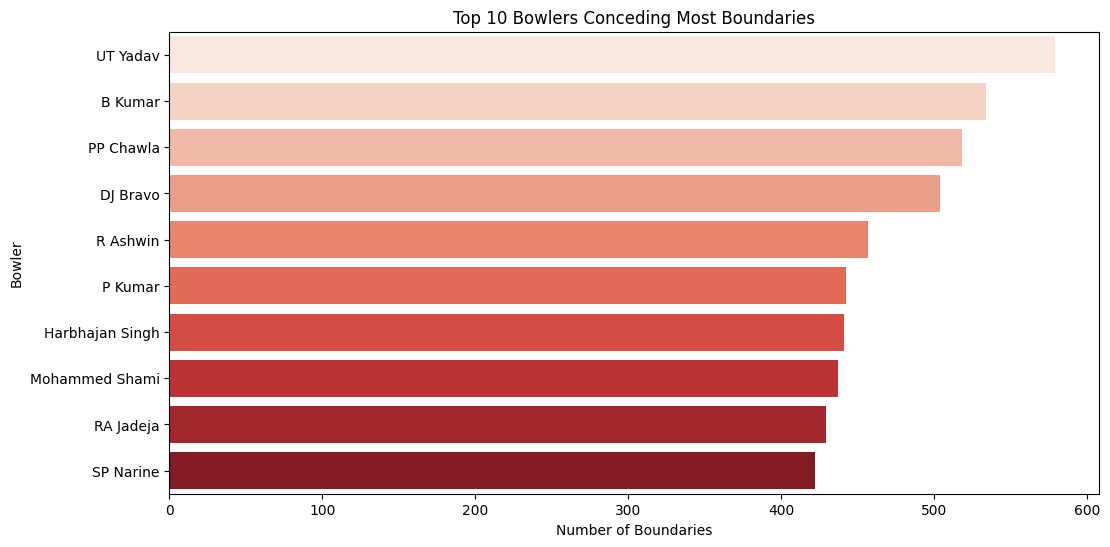

In [ ]:
# Top 10 Bowlers Conceding Most Boundaries (4s and 6s)
boundaries = deliveries_df[deliveries_df['batsman_runs'].isin([4, 6])]
boundaries_by_bowler = boundaries.groupby('bowler')['batsman_runs'].count().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=boundaries_by_bowler.values, y=boundaries_by_bowler.index, palette='Reds')
plt.title('Top 10 Bowlers Conceding Most Boundaries')
plt.xlabel('Number of Boundaries')
plt.ylabel('Bowler')
plt.show()

<ipython-input-14-7e023fb89d82>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_per_over.index, y=wickets_per_over.values, palette='cividis')


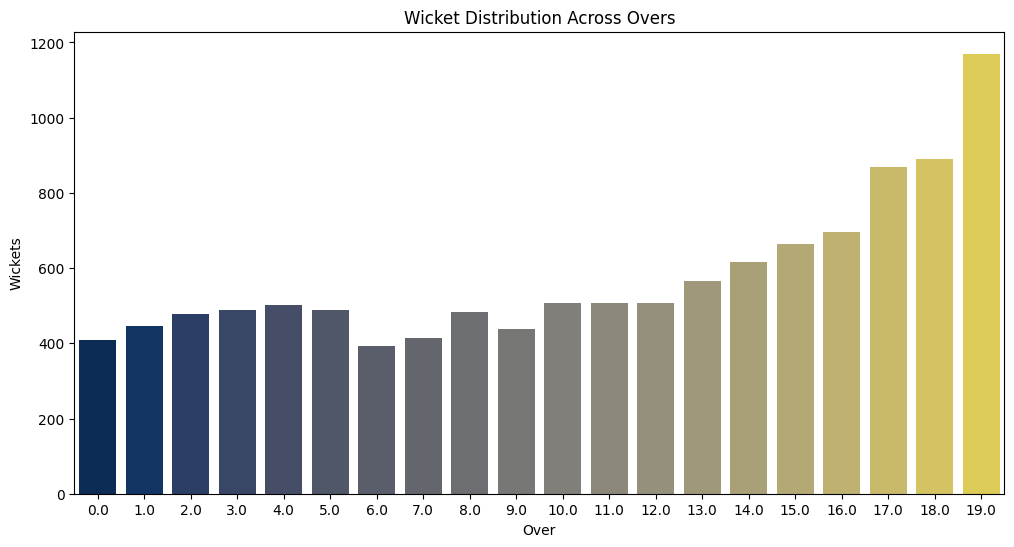

In [ ]:
# Wicket Distribution Across Overs
wickets_per_over = deliveries_df[deliveries_df['is_wicket'] == 1].groupby('over')['is_wicket'].count()
plt.figure(figsize=(12, 6))
sns.barplot(x=wickets_per_over.index, y=wickets_per_over.values, palette='cividis')
plt.title('Wicket Distribution Across Overs')
plt.xlabel('Over')
plt.ylabel('Wickets')
plt.show()

In [ ]:
# Total Runs in Powerplay
powerplay_runs = deliveries_df[deliveries_df['over'] <= 5]['total_runs'].sum()
print(f'Total Runs Scored in Powerplay: {powerplay_runs}')

Total Runs Scored in Powerplay: 90562.0


In [ ]:
# Total Runs in Death Overs
death_over_runs = deliveries_df[(deliveries_df['over'] >= 16) & (deliveries_df['over'] <= 20)]['total_runs'].sum()
print(f'Total Runs Scored in Death Overs: {death_over_runs}')

Total Runs Scored in Death Overs: 66654.0


<ipython-input-17-51c585e296e3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=economy_rate.values, y=economy_rate.index, palette='Greens')


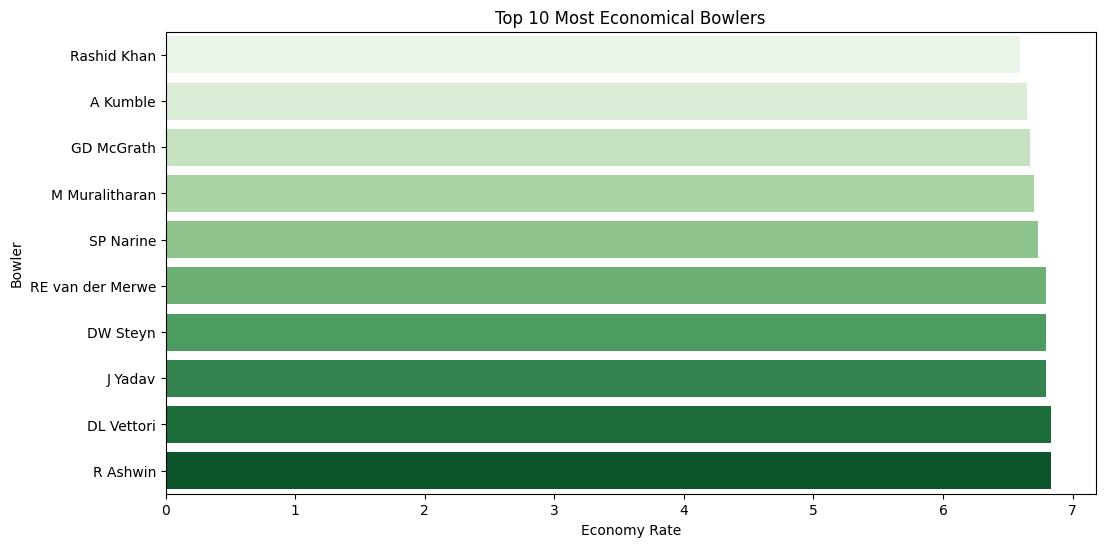

In [ ]:
# Top 10 Most Economical Bowlers (Min 300 Balls)
runs_conceded = deliveries_df.groupby('bowler')['total_runs'].sum()
economy_rate = (runs_conceded / (balls_bowled / 6))
economy_rate = economy_rate[balls_bowled >= 300].nsmallest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=economy_rate.values, y=economy_rate.index, palette='Greens')
plt.title('Top 10 Most Economical Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()